# Приоритизация гипотез, запуск A/B-теста и анализ результатов

Мы — аналитики крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.
В этом проекте мы будем приоритизировать гипотезы, запускать A/B-тест и анализировать полученные результаты. 

## Часть I. Приоритизация гипотез.

### Импорт, анализ и предобработка данных

In [1]:
#импортируем библиотеки
import pandas as pd
pd.set_option('display.max_colwidth', 130)
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

In [2]:
#читаем файл
data = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
#изучим информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


In [4]:
#приведем названия столбцов к верному регистру
data.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [5]:
#смотрим данные
data

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


У нас есть 9 гипотез. Для каждой имеется оценка охвата пользователей, влияние на них, уверенноть в реализации гипотезы и оценка затрат ресурсов на каждую

### Применение фреймворка ICE

In [6]:
#создадим столбец 'ICE'
data['ICE'] = round((data['impact'] * data['confidence']) / data['efforts'], 2)

In [7]:
#посмотрим, какие гипотезы наиболее преспективны, согласно методу ICE
data[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.00


Наиболее перспективные гипотезы по ICE - 8, 0 и 7

### Применение фреймворка RICE

In [8]:
#добавим столбец 'RICE'
data['RICE'] = (data['reach'] * data['impact'] * data['confidence']) / data['efforts']

In [9]:
#посмотрим, какие гипотезы наиболее преспективны, согласно методу RICE
data[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Наиболее перспективные гипотезы по RICE - 7, 2, 0 и 6

Приоритетной по методу RICE оказалась гипотеза по номером 7. так произошло, потому что показатель reach у этой гипотезы(оценка охвата пользователей, которых затронет реализация этой гипотезы) имеет наибольшее значение - 10, в то время как у гипотезы 8, которая стала приоритетной по ICE - показатель reach равен 1 (внедрение этой гипотезы затронет наименьшее количество пользователей)

## Часть II. Анализ A/B-теста

### Импорт, анализ и предобработка данных

In [10]:
#читаем файлы
data_orders = pd.read_csv('/datasets/orders.csv')
data_visitors = pd.read_csv('/datasets/visitors.csv')

In [11]:
#изучаем информацию датафрейма data_orders
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [12]:
#изучаем информацию датафрейма data_visitors
data_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


В обоих датафреймах необходимо изменить тип данных в колонке date с типа object на тип datetime. Так же, в датафрейме "data_orders" необхоимо привести название столбцов в грамотный вид

In [13]:
#смотрим данные датафрейма data_orders
data_orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [14]:
#смотрим данные датафрейма data_visitors
data_visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [15]:
#приводим столбец date к типу datetime
data_orders['date'] = pd.to_datetime(data_orders['date'])

In [16]:
#приводим столбец date к типу datetime
data_visitors['date'] = pd.to_datetime(data_visitors['date'])

In [17]:
data_orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [18]:
#проверяем изменения в датафрейме data_orders
data_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   transaction_id  1197 non-null   int64         
 1   visitor_id      1197 non-null   int64         
 2   date            1197 non-null   datetime64[ns]
 3   revenue         1197 non-null   int64         
 4   group           1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


In [19]:
#проверяем изменения в датафрейме data_visitors
data_visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Проведем еще некоторые предварительные исследования

In [20]:
#посмотрим, какие группы участвуют в тесте
data_visitors['group'].unique()

array(['A', 'B'], dtype=object)

In [21]:
#минимальная дата теста
data_visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [22]:
#максимальная дата теста
data_visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

In [23]:
#количество уникальных пользователей в группах
users_by_group = data_orders.groupby('group')['visitor_id'].nunique()
users_by_group

group
A    503
B    586
Name: visitor_id, dtype: int64

У нас имеется достаточно большая разница в количестве пользователей по группам - около 14%.Но это различие не достаточный повод прекратить исследование

In [24]:
#объеденим датафреймы по столбцу visitor_id
merged_orders = pd.merge(data_orders[data_orders['group'] == 'A'],
                         data_orders[data_orders['group'] == 'B'], on='visitor_id', how='inner')

In [25]:
#найдём дубликаты
duplicates = merged_orders.groupby('visitor_id')
both_group_users = duplicates['visitor_id'].nunique()
both_group_users.shape[0]

58

У нас есть 58 пользователей, которые находятся в обоих группах. Их наличие может существенно повлиять на результаты теста. Удалим дубликаты этих пользователей из наших данных

In [26]:
#удалим дубликаты
data_orders_new = data_orders.query('visitor_id not in @both_group_users')

In [27]:
#выберем пользователей из группы А
visitors_a = data_visitors[data_visitors['group'] == 'A']

In [28]:
#выберем пользователей из группы В
visitors_b = data_visitors[data_visitors['group'] == 'B']

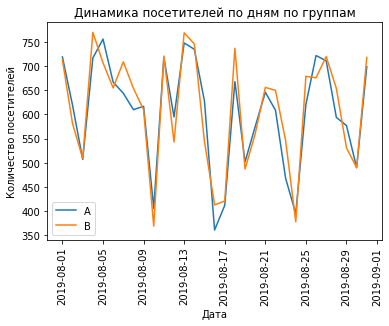

In [29]:
#строим график
plt.plot(visitors_a['date'], visitors_a['visitors'])
plt.plot(visitors_b['date'], visitors_b['visitors'])
plt.legend(['A', 'B'])
plt.title('Динамика посетителей по дням по группам')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.ylabel('Количество посетителей')
plt.show()

В целом динамика посетителей по дням достаточно разнообразна. Есть небольшие всплески у обеих групп, но в целом, количество юзеров практически идентично. Тем не менее, количество посетилетей у группы В хоть ненамного, но преобладает над количеством посетителей группы А

Предобработка данных завершена, переходим к А/В-тесту

### Подготовка к проведению А/В-теста

In [30]:
#создаем массив значений из дат и групп
dates_groups = data_orders_new[['date','group']].drop_duplicates()

In [31]:
#получаем агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = dates_groups.apply(
    lambda x: data_orders_new[
        np.logical_and(
            data_orders_new['date'] <= x['date'], data_orders_new['group'] == x['group']
        )
    ].agg(
        {
            'date' : 'max', 
            'group' : 'max', 
            'transaction_id' : 'nunique', 
            'visitor_id' : 'nunique', 
            'revenue' : 'sum'
        }
    ), 
    axis=1,
).sort_values(by=['date','group'])

In [32]:
#получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина
visitors_aggregated = dates_groups.apply(
    lambda x: data_visitors[
        np.logical_and(
            data_visitors['date'] <= x['date'], data_visitors['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max', 
            'group': 'max', 
            'visitors': 'sum'
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [33]:
#объединяем данные в одной таблице
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'], how='left')
#присваиваем её столбцам понятные названия
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [34]:
#смотрим как прошло объединение
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [35]:
#проверим, корректно ли создан датафрейм. определим минимальную дату
cumulative_data['date'].min()

Timestamp('2019-08-01 00:00:00')

In [36]:
#максимальную дату
cumulative_data['date'].max()

Timestamp('2019-08-31 00:00:00')

Максимальная и минимальная дата аналогичны датам исходного датафрейма, а значит - новый датафрейм создан корректно.

Данные собраны, теперь можно переходить к построению графиков

### График кумулятивной выручки по группам

In [37]:
#создаем датафрейм с кумулятивной выручкой по дням для группы А
cumulative_revenue_a = cumulative_data[cumulative_data['group'] == 'A'][['date', 'revenue', 'orders']]

In [38]:
#создаем датафрейм с кумулятивной выручкой по дням для группы В
cumulative_revenue_b = cumulative_data[cumulative_data['group'] == 'B'][['date', 'revenue', 'orders']]

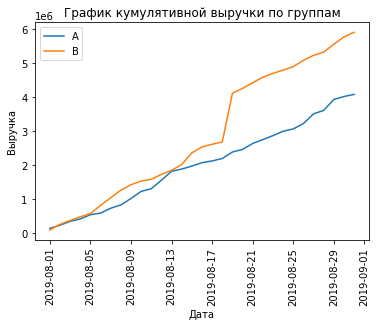

In [39]:
#строим график
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'])
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'])
plt.legend(['A', 'B'])
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.ylabel('Выручка')
plt.show()

Исходя из графика видно, что обе группы начинали с приблизительно одинаковыми значениями выручки. Начиная с 5-го дня теста группа В начала лидировать, а после 18-го дня теста в группе произошел резкий скачок, который позволил остаться группе В на лидирующей позиции с большим отрывом.

Такой скачок может быть вызван либо резким увеличением количества заказов, либо появлением дорогостоящих заказов, сумма которых значительно выше чем у других заказов

### График кумулятивного среднего чека по группам

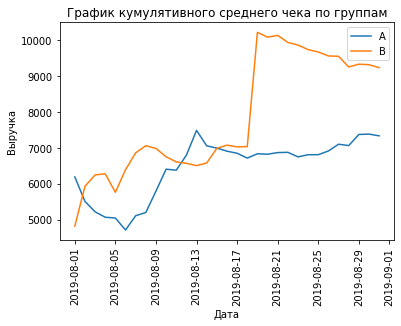

In [40]:
#строим график
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'])
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'])
plt.legend(['A', 'B'])
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.ylabel('Выручка')
plt.show()

Что касается среднего чека - у группы В в первые дни пошел резкий рост среднего чека. Затем, с 11-го по 14 день лидирующей группой стала группа А, а вскоре, после нескольких дней одинакового среднего чека, группа В с большим скачком стала лидирующей

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [41]:
#объединяем данные в один датафрейм
merge_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, on='date', how='left', suffixes=['A', 'B'])

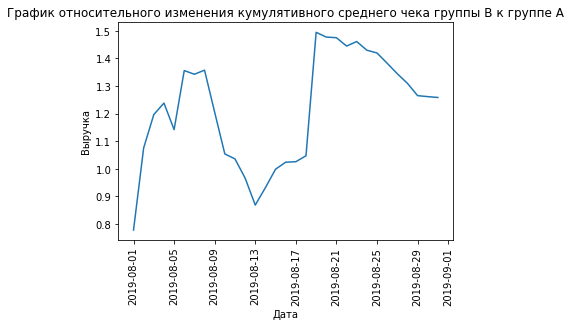

In [42]:
#строим график
plt.plot(merge_cumulative_revenue['date'],
         (merge_cumulative_revenue['revenueB'] / merge_cumulative_revenue['ordersB']) /
         (merge_cumulative_revenue['revenueA'] / merge_cumulative_revenue['ordersA']))
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.ylabel('Выручка')
plt.show()

Согласно графику видно, что результаты теста претерпевали значительные колебания - резкий рост с первого дня, а затем достаточно сильный спад с 8-го до 13-го. А затем последовал подъем, а на 19-й день резкий скачок. Предположительно, в эту дату совершались заказы, с аномально большими суммами

### График кумулятивного среднего количества заказов на посетителя по группам

In [43]:
#добавляем столбец конверсии
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

In [44]:
#выбираем данные по группе А
cumulative_data_a = cumulative_data[cumulative_data['group'] == 'A']

In [45]:
#выбираем данные по группе В
cumulative_data_b = cumulative_data[cumulative_data['group'] == 'B']

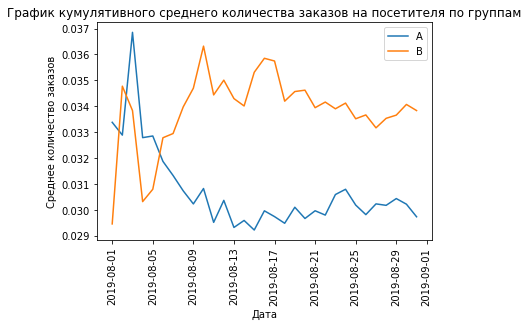

In [46]:
#строим график
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A') 
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B') 
plt.legend(['A', 'B'])
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.ylabel('Среднее количество заказов')
plt.show()

Анализируя график видно, что группа В до 6-го дня теста была на второй позиции. Но начиная с 6-го дня - конверсия заказов группы В росла и разница между группами стала существенной

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [47]:
#
merge_cum_conversion = cumulative_data_a[['date', 'conversion']].merge(cumulative_data_b[['date', 'conversion']], 
                                                                       on='date', how='left', suffixes=['A', 'B'])

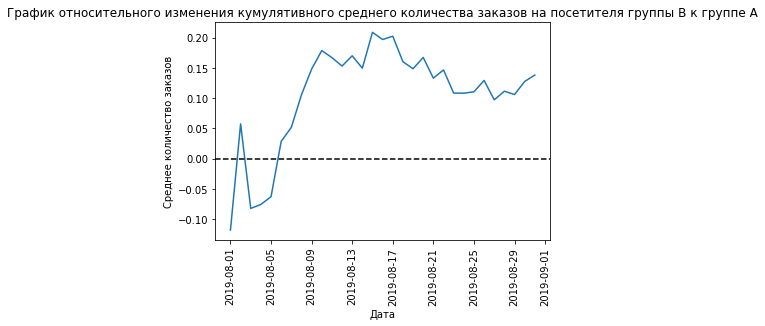

In [48]:
#строим график
plt.plot(merge_cum_conversion['date'], 
         (merge_cum_conversion['conversionB'] / merge_cum_conversion['conversionA']) -1)
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.xticks(rotation=90)
plt.ylabel('Среднее количество заказов')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

С самого начала группа В отставала относительно группы А, но происходил хороший рост. Затем на 2-й день теста конверсия стремительно упала, но в течении 3-х дней после снова стремительно начала расти, по отношению к группе А. К окончанию исследования конверсия группы В ещё не установилась , поэтому делать выводы пока рано

### Точечный график количества заказов по пользователям

In [49]:
#создаём датафрейм с нужными данными
orders_users= data_orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})

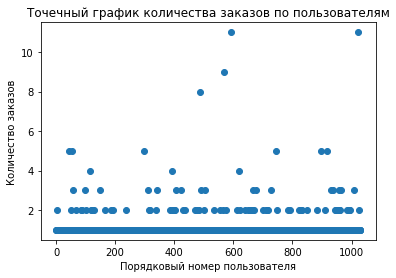

In [50]:
#строим график
x_values = pd.Series(range(0, len(orders_users)))
plt.scatter(x_values, orders_users['transaction_id'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Количество заказов')
plt.show()

Исходя из представленных данных, в основном каждый пользователь совершает 1 покупку. Количество заказов от одного пользователя больше 2-х раз - крайне редкое явление. Есть пользователи, которые оформляли более 10 заказов. Такие значения похожи на выбросы. Посмотрим, какое количество заказов делают большее количество пользователей, рассчитав процентиль

### Расчет 95-й и 99-й перцентиля количества заказов на пользователя

In [51]:
#рассчитываем перцентиль
np.percentile(orders_users['transaction_id'], [95,99])

array([2., 4.])

В основном, пользователи делали 1 заказ. 5% пользователей совершали заказ дважды, и только 1% делали заказ больше 4 раз.
Для дальнейшего анализа границей определения аномальных пользователей возьмем тех, кто делал заказ больше 3-х раз включительно

### Точечный график стоимостей заказов

In [52]:
#группируем заказы по стоимости
revenue_orders = data_orders_new.sort_values(by='revenue', ascending=False)
revenue_orders

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
...,...,...,...,...,...
933,3760662696,3577713868,2019-08-27,60,B
459,863448794,2738601405,2019-08-19,50,B
756,125335873,3423937755,2019-08-30,50,B
584,1126146019,2705308997,2019-08-20,50,A


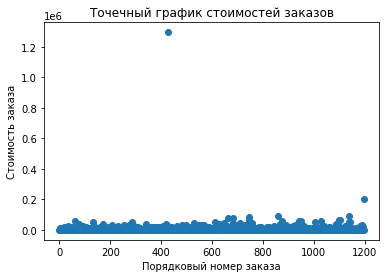

In [53]:
#строим график
x_values = pd.Series(range(0, len(data_orders_new['revenue'])))
plt.scatter(x_values, data_orders_new['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Стоимость заказа')
plt.show()

Получаем довольно интересные данные. У нас есть заказ, стоимостью больше 1,2 миллиона, заказ на 202 тысячи. Однако остальные заказы примерно одинаковых сумм и стоимостью ниже 100 тысяч. Составим еще один график, убрав выбросы больших значений

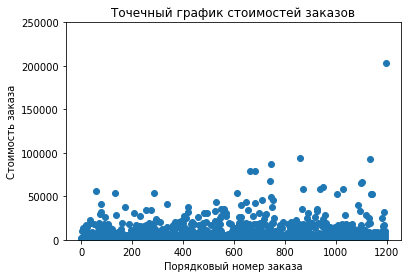

In [54]:
#строим график
x_values = pd.Series(range(0, len(data_orders_new['revenue'])))
plt.scatter(x_values, data_orders_new['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Порядковый номер заказа')
plt.ylabel('Стоимость заказа')
plt.ylim(0, 250000)
plt.show()

Как видно на графике, большая часть заказов не превышает сумму 50 тысяч, а основная часть находится примерно до 25 тысяч. Рассчитаем перцентиль

### Расчет 95-й и 99-й перцентиля стоимости заказов

In [55]:
np.percentile(revenue_orders['revenue'], [95, 99])

array([28000. , 58233.2])

Только 5% заказов превосходят сумму 28000, а 1% заказов на сумму более 54 тысяч. Для дальнейшего анализа мы примем за аномальные заказы те, сумма которых больше 28 тысяч

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сначала сфомулируем гипотезы.
- Нулевая гипотеза: различий в среднем количестве заказов между группами нет
- Альтернативная гипотеза: различия в среднем между группами есть

Подготовим данные для расчетов

In [56]:
#определим ежедневное количество пользователей каждый день из группы А
visitors_a_day = data_visitors[data_visitors['group'] == 'A'][['date', 'visitors']]
visitors_a_day.columns = ['date', 'visitors_A_day']

In [57]:
#определим ежедневное количество пользователей каждый день из группы В
visitors_b_day = data_visitors[data_visitors['group'] == 'B'][['date', 'visitors']]
visitors_b_day.columns = ['date', 'visitors_B_day']

In [58]:
#определим количество посетителей с накоплением по дням для группы А
visitors_a_cumm = visitors_a_day.apply(
    lambda x: visitors_a_day[visitors_a_day['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_A_day': 'sum'}
    ),
    axis=1,
)
visitors_a_cumm.columns = ['date', 'visitors_A_cumm']

In [59]:
#определим количество посетителей с накоплением по дням для группы В
visitors_b_cumm = visitors_b_day.apply(
    lambda x: visitors_b_day[visitors_b_day['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_B_day': 'sum'}
    ),
    axis=1,
)
visitors_b_cumm.columns = ['date', 'visitors_B_cumm']

In [60]:
#посчитаем количество заказов и выручку ежедневно для группы А
orders_a_day = (
    data_orders_new[data_orders_new['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_a_day.columns = ['date', 'orders_A_day', 'revenue_A_day']

In [61]:
#посчитаем количество заказов и выручку ежедневно для группы В
orders_b_day = (
    data_orders_new[data_orders_new['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_b_day.columns = ['date', 'orders_B_day', 'revenue_B_day']

In [62]:
#рассчитаем количество заказов и выручку с накоплением для группы А
orders_a_cumm = orders_a_day.apply(
    lambda x: orders_a_day[orders_a_day['date'] <= x['date']].agg(
        {'date': 'max', 'orders_A_day': 'sum', 'revenue_A_day': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_a_cumm.columns = ['date', 'orders_A_cumm', 'revenue_A_cumm']

In [63]:
#рассчитаем количество заказов и выручку с накоплением для группы B
orders_b_cumm = orders_b_day.apply(
    lambda x: orders_b_day[orders_b_day['date'] <= x['date']].agg(
        {'date': 'max', 'orders_B_day': 'sum', 'revenue_B_day': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
orders_b_cumm.columns = ['date', 'orders_B_cumm', 'revenue_B_cumm']

In [64]:
#объеденим все созданные таблицы по столбцу date
new_data= (
    orders_a_day.merge(
        orders_b_day, on='date', how='left'
    )
    .merge(orders_a_cumm, on='date',  how='left')
    .merge(orders_b_cumm, on='date', how='left')
    .merge(visitors_a_day, on='date', how='left')
    .merge(visitors_b_day, on='date', how='left')
    .merge(visitors_a_cumm, on='date', how='left')
    .merge(visitors_b_cumm, on='date', how='left')
)
#проверим изменения
new_data.head()

,date,orders_A_day,revenue_A_day,orders_B_day,revenue_B_day,orders_A_cumm,revenue_A_cumm,orders_B_cumm,revenue_B_cumm,visitors_A_day,visitors_B_day,visitors_A_cumm,visitors_B_cumm
0,2019-08-01,24,148579,24,148579,24,148579,24,148579,719,713,719,713
1,2019-08-02,20,93822,20,93822,44,242401,44,242401,619,581,1338,1294
2,2019-08-03,24,112473,24,112473,68,354874,68,354874,507,509,1845,1803
3,2019-08-04,16,70825,16,70825,84,425699,84,425699,717,770,2562,2573
4,2019-08-05,25,124218,25,124218,109,549917,109,549917,756,707,3318,3280


In [65]:
#создадим датафрейм с подсчетом количества заказов каждого пользователя группы А
orders_a_users = (
    data_orders_new[data_orders_new['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_a_users.columns = ['user_id', 'orders']

In [66]:
#создадим датафрейм с подсчетом количества заказов каждого пользователя группы B
orders_b_users = (
    data_orders_new[data_orders_new['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_b_users.columns = ['user_id', 'orders']

In [67]:
#заполним значения покупок пользователей, которые их не совершали - нулями для группы А
sample_a = pd.concat([orders_a_users['orders'],
                     pd.Series(0, index=np.arange(new_data['visitors_A_day'].sum() - len(orders_a_users['orders'])),
                               name='orders')],axis=0)

In [68]:
#заполним значения покупок пользователей, которые их не совершали - нулями для группы В
sample_b = pd.concat([orders_b_users['orders'],
                     pd.Series(0, index=np.arange(new_data['visitors_B_day'].sum() - len(orders_b_users['orders'])),
                               name='orders')],axis=0)

Для расчета статистической значимости будем использовать непараметрический тест Уилкоксона-Манна-Уитни. Так как он используется, когда в данных находятся выбросы, которые могут изменять результат теста. В наших "сырых" данных как раз такие имеются

In [69]:
#рассчитаем p-value для сравнения среднего между группами
"{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1])

'0.017'

In [70]:
#рассчитаем относительное различие в среднем между группами
"{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1)

'0.138'

Рассчитаное p-value(0,017) значительно меньше 0,05 - поэтому нулевую гипотезу (Но-различий в среднем количестве заказов между группами нет) можно отвергнуть. Получается, что различия в среднем между группами есть.
Относительный прирост среднего числа заказов группы В превосходит аналогичное значение для группы А на 13,8%. Что показывает, что количество заказов у группы В больше

### Расчет статистической значимости различий  в среднем чеке заказа между группами по «сырым» данным

Установим гипотезы:
- Нулевая гипотеза: различий в среднем чеке между группами нет
- Альтернативная гипотеза: различия в среднем между группами есть

In [71]:
#рассчитаем p-value для сравнения среднего чека между группами
'{0:.3f}'.format(stats.mannwhitneyu(data_orders_new[data_orders_new['group']=='A']['revenue'],
                                    data_orders_new[data_orders_new['group']=='B']['revenue'])[1])

'0.729'

In [72]:
#рассчитаем относительное различие в среднем чеке между группами
'{0:.3f}'.format(data_orders_new[data_orders_new['group']=='B']['revenue'].mean()/
                 data_orders_new[data_orders_new['group']=='A']['revenue'].mean()-1)

'0.259'

Рассчитаный p-value(0,729) гораздо больше 0,05, что говорит нам о том, что отвергать нулевую гипотезу (Но-различий в среднем чеке между группами нет) мы не можем. Тем не менее, средний чек группы В на 25,9% больше среднего чека группы А.

Посмотрим на статистическую значимость, убрав выбросы из данных

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Как уже было указано выше, примем за аномальных пользователей тех, кто делал заказ больше 3-х раз включительно или совершил заказ на сумму более 28 тысяч

Сфомулируем гипотезы.

- Нулевая гипотеза: различий в среднем количестве заказов между группами нет
- Альтернативная гипотеза: различия в среднем между группами есть

In [73]:
#добавим коду автоматизированности, добавляя в расчеты значения выбранного перцентиля
percentile = 0.95
orders_a_threshold = orders_a_users['orders'].quantile(percentile)
orders_b_threshold = orders_b_users['orders'].quantile(percentile)

In [74]:
#посчитаем количество аномальных пользователей с числом заказа более трех включительно
users_many_orders = pd.concat(
    [
        orders_a_users[orders_a_users['orders'] > orders_a_threshold]['user_id'],
        orders_b_users[orders_b_users['orders'] > orders_b_threshold]['user_id'],
    ],
    axis=0,
)

In [75]:
#аналогично поступим и с определением стоимости заказов
percentile = 0.95
expensive_orders = data_orders_new['revenue'].quantile(percentile)

In [76]:
#определим количество аномальных пользователей с суммой оплаты заказа более 30 тысяч
users_expensive_orders = data_orders_new[data_orders_new['revenue'] > expensive_orders]['visitor_id']

In [77]:
#объеденим предыдущие 2 таблицы и определим, сколько у нас пользователей в числе аномальных
not_normal_users = (
    pd.concat([users_many_orders, users_expensive_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
not_normal_users.shape[0]

74

Получается, что из всех пользователей - 74 юзеров являются аномальными (с большим количеством заказов или дорогостоящими заказами). Исключим их и снова посчитаем ститистическую значимость

In [78]:
#устраним аномальных пользователей из группы А
sample_a_filtered = pd.concat(
    [
        orders_a_users[
            np.logical_not(orders_a_users['user_id'].isin(not_normal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                new_data['visitors_A_day'].sum() - len(orders_a_users['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0)

In [79]:
#устраним аномальных пользователей из группы В
sample_b_filtered = pd.concat(
    [
        orders_b_users[
            np.logical_not(orders_b_users['user_id'].isin(not_normal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                new_data['visitors_B_day'].sum() - len(orders_b_users['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0)

In [80]:
#рассчитаем p-value для сравнения среднего между отфильтрованными группами
'{0:.3f}'.format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1])

'0.013'

In [81]:
#рассчитаем относительное различие в среднем между отфильтрованными группами
'{0:.3f}'.format(sample_b_filtered.mean()/sample_a_filtered.mean()-1)

'0.173'

По сравнению с "сырыми данными" кардинально ничего не изменилось - p-value(0.013 - а в "сырых" данных значение составило 0,017) меньше 0,05. Относительный прирост среднего числа заказов группы В составляет 17,3%( в "сырых" данных показатель составил 13,8%)
Нулевую гипотезу мы отвергаем - различия в среднем между группами есть

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Установим гипотезы:

- Нулевая гипотеза: различий в среднем чеке между группами нет
- Альтернативная гипотеза: различия в среднем между группами есть

In [82]:
#рассчитаем p-value для сравнения среднего чека между группами по «очищенным» данным
'{0:.3f}'.format(
        stats.mannwhitneyu(
            data_orders_new[
                np.logical_and(
                    data_orders_new['group'] == 'A',
                    np.logical_not(data_orders_new['visitor_id'].isin(not_normal_users)),
                )
            ]['revenue'],
            data_orders_new[
                np.logical_and(
                    data_orders_new['group'] == 'B',
                    np.logical_not(data_orders_new['visitor_id'].isin(not_normal_users)),
                )
            ]['revenue'],
        )[1]
    )

'0.738'

In [83]:
##рассчитаем относительное различие в среднем чеке между группами по «очищенным» данным
"{0:.3f}".format(
        data_orders_new[
            np.logical_and(
                data_orders_new['group'] == 'B',
                np.logical_not(data_orders_new['visitor_id'].isin(not_normal_users)),
            )
        ]['revenue'].mean()
        / data_orders_new[
            np.logical_and(
                data_orders_new['group'] == 'A',
                np.logical_not(data_orders_new['visitor_id'].isin(not_normal_users)),
            )
        ]['revenue'].mean()
        - 1
    )

'-0.020'

По отфильтрованным данным значение p-value(0,739) осталось аналогичным как и по "сырым" данным (p-value = 0,729). Соответственно, мы не можем отвергнуть нулевую гипотезу - различий в среднем чеке между группами нет.
Изменилось относительное различие в среднем чеке - по отфильтрованным данным у группы В средний чек ниже среднего чека группы А на -2%. 

## Результаты А/В-теста

Подытожим результаты:

- P-value для сравнения среднего между группами ("сырые" данные) - 0,017
- относительное различие в среднем между группами ("сырые" данные) - 0,138

- P-value для сравнения среднего между группами (отфильтрованные данные) - 0,013
- относительное различие в среднем между группами (отфильтрованные данные) - 0,173

- P-value для сравнения среднего чека между группами ("сырые" данные) - 0,729
- относительное различие в среднем чеке между группами ("сырые" данные) - 0,259

- P-value для сравнения среднего чека между группами (отфильтрованные данные) - 0,738
- относительное различие в среднем чеке между группами (отфильтрованные данные) - -0,020

- По результатам теста выявлено - нет значимых различий в среднем чеке между группами. 
- Есть значительные различия в среднем между группами, скорее всего, это связано с тем, что группа В является тестовой, и использовала сайт нашего интернет-магазина с изменениями.
- На протяжении теста пользователи из группы В имели большую конверсию в покупателей, по сравнению с группой А
- Тест длился на протяжении 31 дня
- Были обнаружены пользователи, которые находились в обоих группах одновременно, что является недопустимым для исследования, эти пользователи были удалены из дальнейшего теста

Отделом аналитики рекомендуется остановить тест - фиксируя факт преимущества группы В